In [120]:
# Dependencies
%matplotlib inline
from ipywidgets.embed import embed_minimal_html
import requests
from pprint import pprint
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import gmaps
from config import gkey
from config import api_key
import us

In [121]:
# Specify the URL for covidtracking
url_cov = "https://covidtracking.com"
current_data = "/api/v1/us/current.json"

# Make request and store response
response_current = requests.get(url_cov+current_data).json()

# Print response
pprint(response_current)


[{'death': 81729,
  'hash': '5ae17aa7b797e1340fce7706eeda1868a7c9cba4',
  'hospitalized': 153866,
  'hospitalizedCumulative': 153866,
  'hospitalizedCurrently': 42854,
  'inIcuCumulative': 6890,
  'inIcuCurrently': 10704,
  'lastModified': '2020-05-16T04:12:45.637Z',
  'negative': 9286489,
  'notes': 'NOTE: "total", "posNeg", "hospitalized" will be removed in the '
           'future.',
  'onVentilatorCumulative': 589,
  'onVentilatorCurrently': 5746,
  'pending': 2457,
  'posNeg': 10720185,
  'positive': 1433696,
  'recovered': 250747,
  'total': 10722642,
  'totalTestResults': 10720185}]


In [122]:
# Create a list that stores specific dates 
dates = ["20200131", "20200313", "20200323", "20200327", "20200331", "20200416", "20200508"]

# create "total" list
total = []

# Create for loop to look at total US people tested positive
for date in dates:
    
    # Set specific url and params   
    date_data = f"/api/v1/us/{date}.json"
    
    # Make request and store response
    response_date = requests.get(url_cov+date_data).json()
    
    # Store total number of people tested positive in the US
    total_positive = response_date["positive"]
    
    # Add the positive cases in the positive list
    total.append(total_positive)

# Print the total positive cases list
print(total)

[1, 3004, 47013, 105462, 189998, 664129, 1275916]


In [123]:
# Create a data frame to show the dates and total positive cases for the entire US
cov_df = pd.DataFrame({"Date": dates, "Total": total})
cov_df

,Date,Total
0,20200131,1
1,20200313,3004
2,20200323,47013
3,20200327,105462
4,20200331,189998
5,20200416,664129
6,20200508,1275916


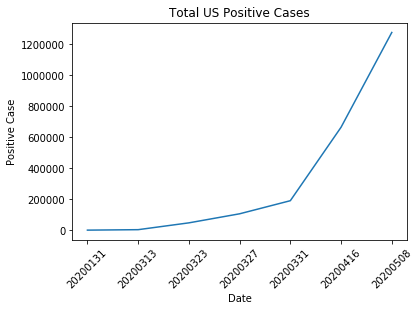

In [124]:
# Plot a line graph to show dates vs. number of positive cases 
plt.plot(cov_df["Date"], cov_df["Total"])

# Rotate the x ticks 
plt.xticks(rotation = 45)

# Add a title for the plot
plt.title("Total US Positive Cases")

# Add x labels for the plot
plt.xlabel("Date")

# Add y labels for the plot
plt.ylabel("Positive Case")

# Store the current figure 
total_us = plt.gcf()

# Show the plot
plt.show()

# Export the plot figure as .png
total_us.savefig('Total US Positive Cases.png', bbox_inches = "tight")

In [125]:
# Create the list to store which state the headquarters are located at
headquarter=[]

# Create a list of all the companies we are looking at
name_compnay = [
    "Netflix", "Activision Blizzard", "Cinemark", "Live Nation Entertainment", "Amazon", "Ebay", "TJ Maxx", "Big Lots", "Macy's",
    "Kroger", "Campbell Soup", "McDonald’s", "J Alexanders Holding Inc", "Extended Stay", "United Airlines", "Marriott International Inc",
    "Clearwater Paper Corp", "Clorox", "T-mobile", "Microsoft"
]

# Create a list of all stock's abbreviation
stocks = [
    "NFLX", "ATVI", "CNK", "LYV", "AMZN", "EBAY", "TJX" , "BIG", "M", "KR", "CPB", 
    "MCD", "JAX", "STAY", "UAL", "MAR", "CLW", "CLX", "TMUS", "MSFT"
]

# Specify the URL from rapidapi's yahoo finance
url_state = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-profile"

# Create a for loop to look into different APIs to request response for different stocks 
for stock in stocks:
    
    # Store param for the url 
    querystring = {"symbol":stock}
    
    # Store headers for the url
    headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': api_key
        }

    # Make request and store response
    response_profile = requests.request("GET", url_state, headers=headers, params=querystring).json()

    # Get which state the headquarter of each stock is located at
    headquarter_state = response_profile["assetProfile"]["state"]

    # Add the states into the headquarter list
    headquarter.append(headquarter_state)

# Check the number of states we got matches with number of stocks in the stock list
assert len(headquarter)==len(stocks)


# Create a data frame that shows the state that the headquarter is located and the stock
headquarter_df = pd.DataFrame({"Company": name_compnay, "Headquarter": headquarter})
print(headquarter_df)

                       Company Headquarter
0                      Netflix          CA
1          Activision Blizzard          CA
2                     Cinemark          TX
3    Live Nation Entertainment          CA
4                       Amazon          WA
5                         Ebay          CA
6                      TJ Maxx          MA
7                     Big Lots          OH
8                       Macy's          NY
9                       Kroger          OH
10               Campbell Soup          NJ
11                  McDonald’s          IL
12    J Alexanders Holding Inc          TN
13               Extended Stay          NC
14             United Airlines          IL
15  Marriott International Inc          MD
16       Clearwater Paper Corp          WA
17                      Clorox          CA
18                    T-mobile          WA
19                   Microsoft          WA


In [126]:
# Combine all the companies in the same state together in the "Company" column
headquarter_df["Company"]=headquarter_df.groupby(["Headquarter"])["Company"].transform(lambda x: ','.join(x))

# Drop duplicated rows
headquarter_unique_df = headquarter_df.drop_duplicates()

# Reset the index for the data frame
reset_headquarter = headquarter_unique_df.reset_index()

# Drop the "index" column
reset_headquarter = reset_headquarter.iloc[:,1:3]

# Sort data frame by "Headquarter" column
reset_headquarter = reset_headquarter.sort_index(ascending=False)

# Set "Headquarter" and "Company" column as index
headquarter_setindex = reset_headquarter.set_index(["Headquarter", "Company"])

# Switch the column and rows of the data frame
headquarter_transposed = headquarter_setindex.T

# Print data frame
headquarter_transposed


Headquarter,MD,NC,TN,IL,NJ,NY,OH,MA,WA,TX,CA
Company,Marriott International Inc,Extended Stay,J Alexanders Holding Inc,"McDonald’s,United Airlines",Campbell Soup,Macy's,"Big Lots,Kroger",TJ Maxx,"Amazon,Clearwater Paper Corp,T-mobile,Microsoft",Cinemark,"Netflix,Activision Blizzard,Live Nation Entertainment,Ebay,Clorox"


In [102]:
# # Speicify the url for covidtracking
# state_date = f"/api/v1/states/CA/20200313.json"

# # Make request and store response
# response_current = requests.get(url_cov+state_date).json()

# # Store current positive cases in US
# total_positive_per_date = response_current["positive"]


# total_positive_per_date

In [127]:
# Create an array that stores all the states that the headquarters are located at
headquarter_unique = headquarter_df["Headquarter"].unique()

# Delete "20200131" from the "date" list
dates.remove("20200131")

# Print "dates" list
print(dates)


['20200313', '20200323', '20200327', '20200331', '20200416', '20200508']


In [128]:
# Create a data frame that its columns will have a column called "Date"
merge_df = pd.DataFrame(columns = ["Date"])

# Loop through each API to get cov-19 information for states in the "headquarter_unique"
for state in headquarter_unique:
    
    # Create empty lists to store positive cases per date and dates
    cov_per_date = []
    date_per_state = []
    
    # Loop through each API to get cov-19 information for date in the "date"
    for date in dates:

        # Specify url
        state_date = f"/api/v1/states/{state}/{date}.json"
        
        # Get request and store the response
        response_current = requests.get(url_cov+state_date).json()
        
        # Store positive cases 
        total_positive_per_date = response_current["positive"]
        
        # Add positive cases in the list
        cov_per_date.append(total_positive_per_date)
        
        # Add dates in the list
        date_per_state.append(date)
        
    # Create a data frame that stores positive cases for specific state on specific dates
    date_covnumber_df = pd.DataFrame({"Date":date_per_state, f"{state}": cov_per_date})

    # Merge all the data frame with different states' information into one data frame
    merge_df = pd.merge(date_covnumber_df, merge_df, how = "outer", on = "Date" )
    
# Set "Date" column as index
merge_index = merge_df.set_index(["Date"])

# Print data frame
print(merge_index)

             MD     NC     TN     IL      NJ      NY     OH     MA     WA  \
Date                                                                        
20200313     17     15     26     32      50     421     13     23    702   
20200323    288    297    615   1273    2844   20875    442    678   2496   
20200327    774    763   1203   3026    8825   44635   1137   3151   4305   
20200331   1660   1498   2239   5994   18696   75795   2199   6521   6049   
20200416  10784   5465   6262  25733   75317  222284   8414  32492  11343   
20200508  30485  13868  14441  73760  135454  330407  23016  75333  16231   

             TX     CA  
Date                    
20200313     39    202  
20200323    352   1733  
20200327   1731   3879  
20200331   3266   7482  
20200416  16455  26182  
20200508  36609  62512  


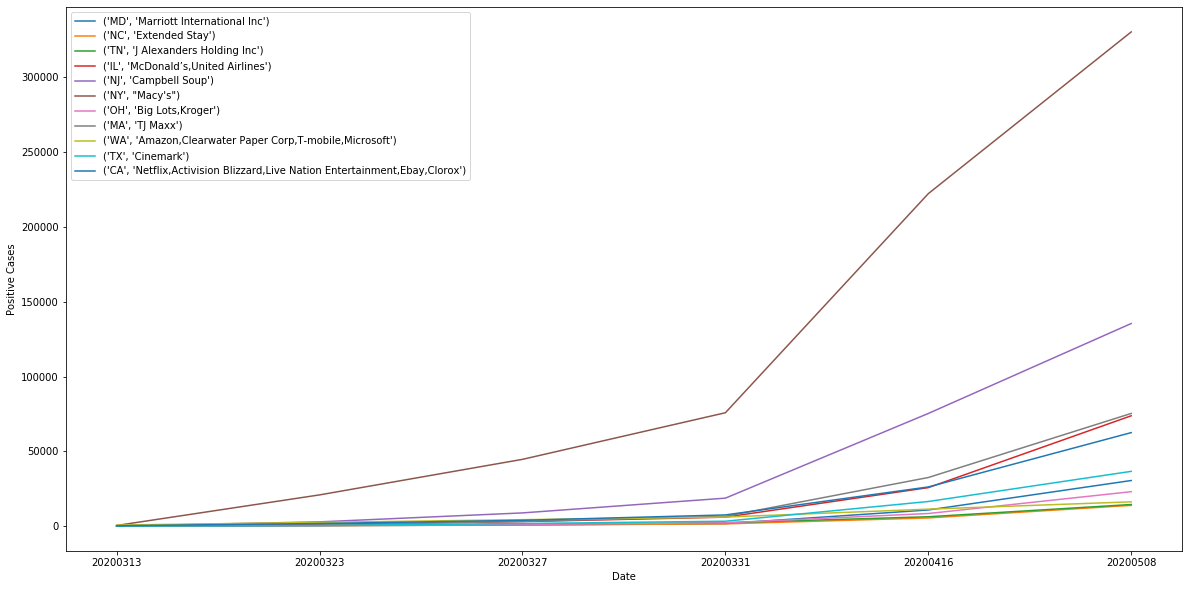

In [119]:
# Plot a line graph that shows all states' positive cases vs. different dates
merge_index.plot(kind = "line", figsize = (20,10))

# Add legend to the graph
plt.legend(headquarter_transposed)

# Add label for y-axis
plt.ylabel("Positive Cases")

# Store current figure 
total_state = plt.gcf()

# Show the graph
plt.show()

# Export the graph as .png
total_state.savefig('Positive Cases per State.png', bbox_inches = "tight")

In [129]:
# Configure gmaps with API key
gmaps.configure(api_key = gkey)

In [130]:
# Create a list that contains all the states' names in the US
state_name = [state.name for state in us.states.STATES]
state_name

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [131]:
# Create empty lists for latitude and longitude
lat = []
lng = []

# Set params
params = {"key": gkey}

# Loop through all the states to get their latitude and longitude
for name in state_names:
    
    # Set specific url
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Add params for the url
    params['address'] = f"{name}"

    # Get request and store response
    state_lat_lng = requests.get(base_url, params=params)
    state_lat_lng = state_lat_lng.json()
    
    # Add latitude and longitude in their lists
    lat.append(state_lat_lng["results"][0]["geometry"]["location"]["lat"])
    lng.append(state_lat_lng["results"][0]["geometry"]["location"]["lng"])

# Create a data frame that shows all states, and their latitude and longitude
state_location = pd.DataFrame({"State": state_names, "Lat":lat, "Lng": lng})

# Show the first five rows in the "state_location" data grame
state_location.head()

,State,Lat,Lng
0,Alabama,32.318231,-86.902298
1,Alaska,64.200841,-149.493673
2,Arizona,34.048928,-111.093731
3,Arkansas,35.201050,-91.831833
4,California,36.778261,-119.417932


In [137]:
# Create a list that contains all states' abbreviation
state_abbr = [state.abbr for state in us.states.STATES]

In [138]:
# Create empty lists to store number of positivie cases, state abbreviations, and state names
positive_0313 = []
state_0313 = []
name_0313 = []

# Loop through all the state' abbreviation to get information from the covidtracking API
for abbr in state_abbr:

    # Try to get the information for the date 03/13/20
    try:
        
        # Set specific url
        state_date = f"/api/v1/states/{abbr}/20200313.json"
        
        # Get request and store response
        response_current = requests.get(url_cov+state_date).json()
        
        # Store number of positive cases for each state
        total_positive_per_date = response_current["positive"]
        
        # Store the state name
        state = response_current["state"]
        
        # Add number of positive cases in the list
        positive_0313.append(total_positive_per_date)
        
        # Add state names in the list
        state_0313.append(state)
        
    # Handle exceptions for a state that is not available in the covidtracking API
    except:
        pass


In [139]:
# Loop through the state abbreviation and return the full name of the state
for abbr in state_0313:
    name_0313.append(us.states.lookup(abbr).name)

In [140]:
# Create a data frame with all states in the US and the number of positive cases in each state
df_0313 = pd.DataFrame({"State": name_0313, "Positive Cases": positive_0313})
df_0313.head()


,State,Positive Cases
0,Alabama,1
1,Alaska,1
2,Arizona,9
3,Arkansas,9
4,California,202


In [141]:
# Merge the data frames so the merged data frame will have the states' name, latitude, longitude, and number of positive cases
merged_0313 = pd.merge(state_location, df_0313, on = "State")
merged_0313.head()

,State,Lat,Lng,Positive Cases
0,Alabama,32.318231,-86.902298,1
1,Alaska,64.200841,-149.493673,1
2,Arizona,34.048928,-111.093731,9
3,Arkansas,35.201050,-91.831833,9
4,California,36.778261,-119.417932,202


In [142]:
# Store google the map figure
fig = gmaps.figure()

# Set params for the google map API
# Set location to be the latitude and longitude
location = location = merged_0313[["Lat", "Lng"]]

# Set rating to be the number of positive cases
rating = merged_0313["Positive Cases"]

# Create a heat layer for the google map
heat_layer = gmaps.heatmap_layer(
    location,
    weights = rating,
    dissipating = True,
    max_intensity = 150
)

# Add the heat layer to the google map figure
fig.add_layer(heat_layer)

# Show the final google map figure
fig


Figure(layout=FigureLayout(height='420px'))

In [148]:
# Create empty lists to store number of positivie cases, state abbreviations, and state names
positive_0327 = []
state_0327 = []
name_0327 = []

# Loop through all the state' abbreviation to get information from the covidtracking API
for abbr in state_abbr:

    # Try to get the information for the date 03/27/20
    try:
        
        # Set specific url 
        state_date = f"/api/v1/states/{abbr}/20200327.json"
        
        # Get request and store response
        response_current = requests.get(url_cov+state_date).json()
        
        # Store number of positive cases for each state
        total_positive_per_date = response_current["positive"]
        
        # Store the state name
        state = response_current["state"]
        
        # Add number of positive cases in the list
        positive_0327.append(total_positive_per_date)
        
        # Add state names in the list
        state_0327.append(state)
    
    # Handle exceptions for a state that is not available in the covidtracking API
    except:
        pass


In [149]:
# Loop through the state abbreviation and return the full name of the state
for abbr in state_0327:
    name_0327.append(us.states.lookup(abbr).name)

In [150]:
# Create a data frame with all states in the US and the number of positive cases in each state
df_0327 = pd.DataFrame({"State": name_0327, "Positive Cases": positive_0327})
df_0327.head()

,State,Positive Cases
0,Alabama,587
1,Alaska,69
2,Arizona,736
3,Arkansas,381
4,California,3879


In [151]:
# Merge the data frames so the merged data frame will have the states' name, latitude, longitude, and number of positive cases
merged_0327 = pd.merge(state_location, df_0327, on = "State")
merged_0327.head()

,State,Lat,Lng,Positive Cases
0,Alabama,32.318231,-86.902298,587
1,Alaska,64.200841,-149.493673,69
2,Arizona,34.048928,-111.093731,736
3,Arkansas,35.201050,-91.831833,381
4,California,36.778261,-119.417932,3879


In [153]:
# Store google the map figure
fig = gmaps.figure()

# Set params for the google map API
# Set location to be the latitude and longitude
location = location = merged_0327[["Lat", "Lng"]]

# Set rating to be the number of positive cases
rating = merged_0327["Positive Cases"]

# Create a heat layer for the google map
heat_layer = gmaps.heatmap_layer(
    location,
    weights = rating,
    dissipating = True,
    max_intensity = 150
)

# Add the heat layer to the google map figure
fig.add_layer(heat_layer)

# Show the final google map figure
fig



Figure(layout=FigureLayout(height='420px'))

In [154]:
# Create empty lists to store number of positivie cases, state abbreviations, and state names
positive_0416 = []
state_0416 = []
name_0416 = []

# Loop through all the state' abbreviation to get information from the covidtracking API
for abbr in state_abbr:

    # Try to get the information for the date 04/16/20
    try:
        
        # Set specific url 
        state_date = f"/api/v1/states/{abbr}/20200416.json"
        
        # Get request and store response
        response_current = requests.get(url_cov+state_date).json()
        
        # Store number of positive cases for each state
        total_positive_per_date = response_current["positive"]
        
        # Store the state name
        state = response_current["state"]
        
        # Add number of positive cases in the list
        positive_0416.append(total_positive_per_date)
        
        # Add state names in the list
        state_0416.append(state)
        
    # Handle exceptions for a state that is not available in the covidtracking API
    except:
        pass


In [155]:
# Loop through the state abbreviation and return the full name of the state
for abbr in state_0416:
    name_0416.append(us.states.lookup(abbr).name)

In [156]:
# Create a data frame with all states in the US and the number of positive cases in each state
df_0416 = pd.DataFrame({"State": name_0416, "Positive Cases": positive_0416})
df_0416.head()

,State,Positive Cases
0,Alabama,4345
1,Alaska,300
2,Arizona,4234
3,Arkansas,1620
4,California,26182


In [157]:
# Merge the data frames so the merged data frame will have the states' name, latitude, longitude, and number of positive cases
merged_0416 = pd.merge(state_location, df_0416, on = "State")
merged_0416.head()

,State,Lat,Lng,Positive Cases
0,Alabama,32.318231,-86.902298,4345
1,Alaska,64.200841,-149.493673,300
2,Arizona,34.048928,-111.093731,4234
3,Arkansas,35.201050,-91.831833,1620
4,California,36.778261,-119.417932,26182


In [158]:
# Store google the map figure
fig = gmaps.figure()

# Set params for the google map API
# Set location to be the latitude and longitude
location = location = merged_0416[["Lat", "Lng"]]

# Set rating to be the number of positive cases
rating = merged_0416["Positive Cases"]

# Create a heat layer for the google map
heat_layer = gmaps.heatmap_layer(
    location,
    weights = rating,
    dissipating = True,
    max_intensity = 150
)

# Add the heat layer to the google map figure
fig.add_layer(heat_layer)

# Show the final google map figure
fig


Figure(layout=FigureLayout(height='420px'))